In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow keras opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert to grayscale
x_train_gray = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])
x_test_gray = np.dot(x_test[...,:3], [0.2989, 0.5870, 0.1140])

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0

# Expand grayscale images to have a single channel
x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)

# Split into training and validation sets
x_train_gray, x_val_gray, x_train, x_val = train_test_split(x_train_gray, x_train, test_size=0.1, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

def unet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Decoder
    u2 = UpSampling2D((2, 2))(c3)
    u2 = Concatenate()([u2, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u1 = UpSampling2D((2, 2))(c4)
    u1 = Concatenate()([u1, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(3, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

input_shape = (32, 32, 1)
model = unet_model(input_shape)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 16, 16, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 8, 8, 128)      │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 8, 8, 256)      │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 8, 8, 256)      │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 384)    │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 128)    │        442,496 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 128)    │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 32, 32, 192)    │              0 │ up_sampling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 64)     │        110,656 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)    

 Total params: 1,882,115 (7.18 MB)

 Trainable params: 1,882,115 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train_gray, x_train, epochs=100, batch_size=64, validation_data=(x_val_gray, x_val))

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 0.0143 - val_loss: 0.0054
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 9/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 10/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 11/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 12/100
704/70

In [ ]:
loss = model.evaluate(x_test_gray, x_test)
print(f'Test Loss: {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0059
Test Loss: 0.00582630792632699


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


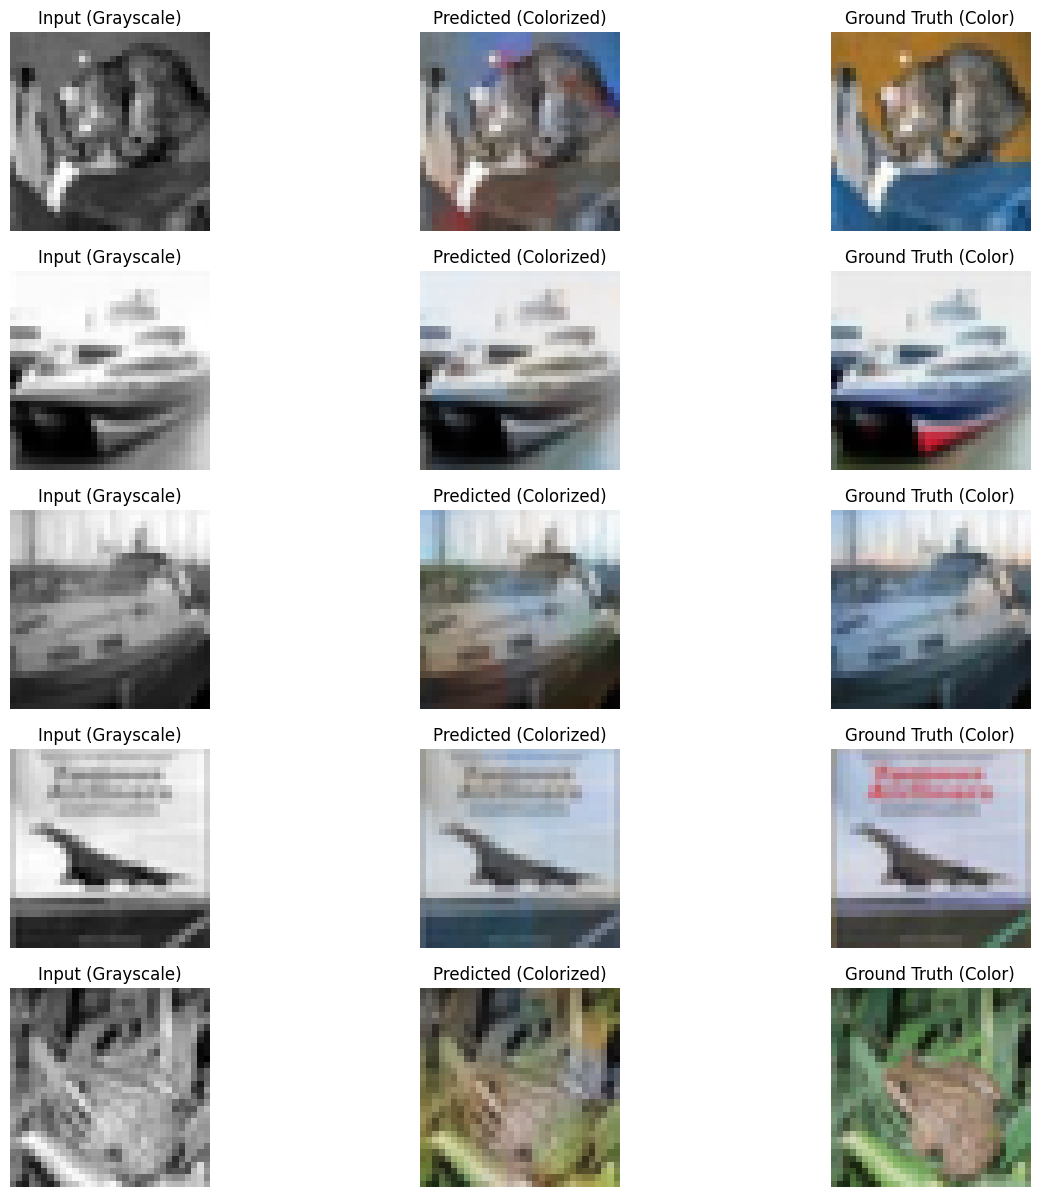

In [ ]:
def plot_colorization_results(input_gray, predicted_color, ground_truth, num_images=5):
    fig, axes = plt.subplots(num_images, 3, figsize=(15, 15))
    for i in range(num_images):
        axes[i, 0].imshow(input_gray[i].reshape(32, 32), cmap='gray')
        axes[i, 0].set_title('Input (Grayscale)')
        axes[i, 1].imshow(predicted_color[i])
        axes[i, 1].set_title('Predicted (Colorized)')
        axes[i, 2].imshow(ground_truth[i])
        axes[i, 2].set_title('Ground Truth (Color)')
        for ax in axes[i]:
            ax.axis('off')
    plt.show()

# Generate predictions
predicted_color = model.predict(x_test_gray)

# Visualize the results
plot_colorization_results(x_test_gray, predicted_color, x_test)

In [ ]:
import cv2

def enhance_image(image):
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge channels back
    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    return enhanced_img

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


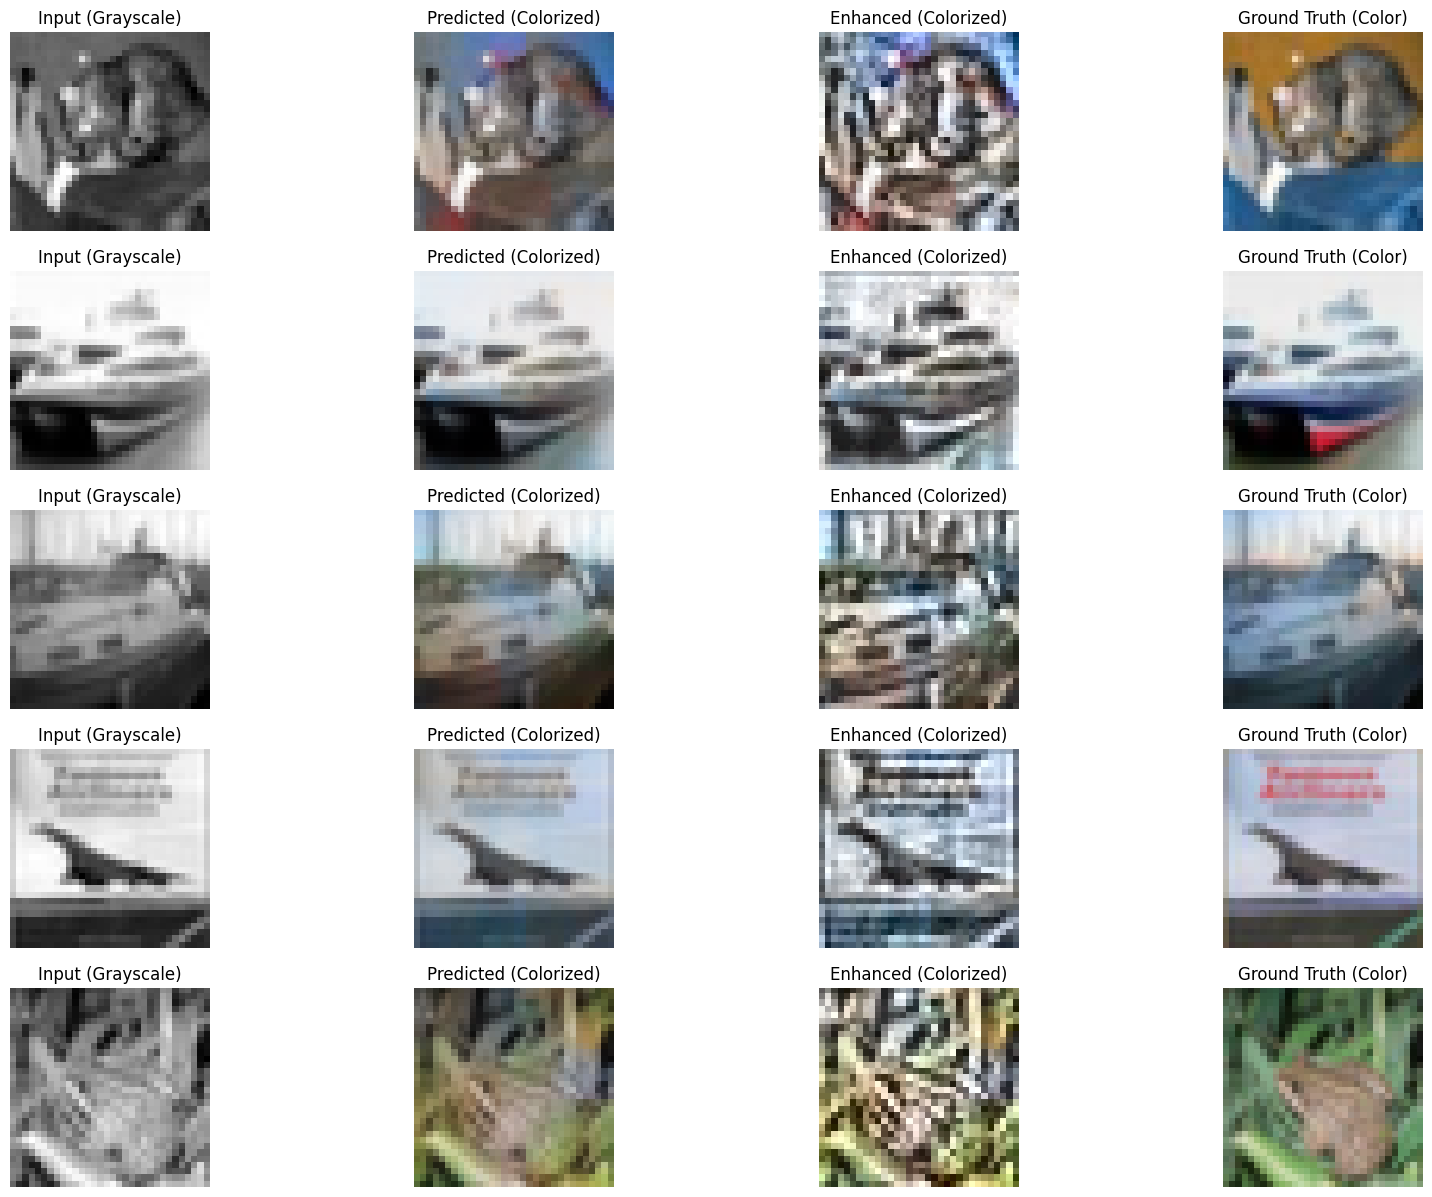

In [ ]:
def plot_colorization_results(input_gray, predicted_color, ground_truth, num_images=5):
    fig, axes = plt.subplots(num_images, 4, figsize=(20, 15))
    for i in range(num_images):
        enhanced_img = enhance_image((predicted_color[i] * 255).astype('uint8'))

        axes[i, 0].imshow(input_gray[i].reshape(32, 32), cmap='gray')
        axes[i, 0].set_title('Input (Grayscale)')

        axes[i, 1].imshow(predicted_color[i])
        axes[i, 1].set_title('Predicted (Colorized)')

        axes[i, 2].imshow(enhanced_img)
        axes[i, 2].set_title('Enhanced (Colorized)')

        axes[i, 3].imshow(ground_truth[i])
        axes[i, 3].set_title('Ground Truth (Color)')

        for ax in axes[i]:
            ax.axis('off')
    plt.show()

# Generate predictions
predicted_color = model.predict(x_test_gray)

# Visualize the results
plot_colorization_results(x_test_gray, predicted_color, x_test)